PROJECT 3


In [321]:
from typing import Tuple
import importlib
import numpy as np
from numpy.linalg import inv
import numpy.random as rn
import matplotlib.pyplot as plt
import cvxpy as cp
from tqdm import tqdm

import proj3_gridworld
import proj3_agent
importlib.reload(proj3_gridworld)
importlib.reload(proj3_agent)
from proj3_gridworld import Gridworld
from proj3_agent import Agent

# Reinforcement Learning

Question (1)

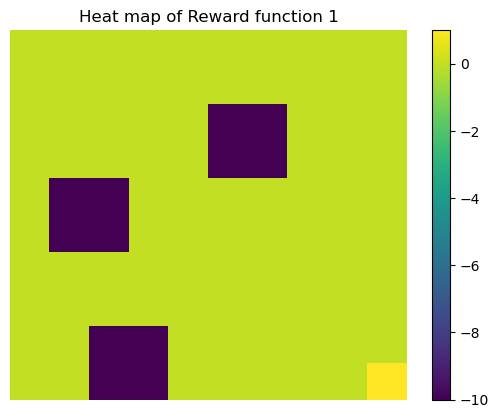

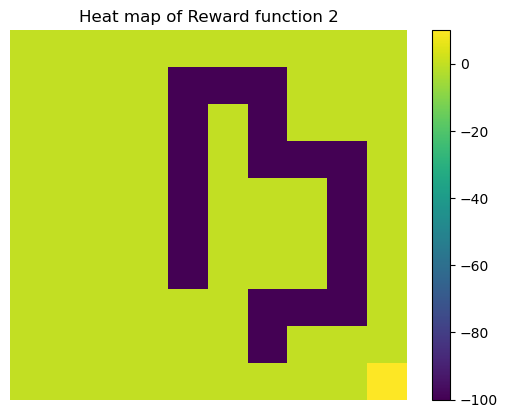

In [247]:
## For visualization generating the heat map of the ground truth reward
plt.pcolor(np.flipud(Gridworld.f1))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 1')
plt.show()

plt.pcolor(np.flipud(Gridworld.f2))
plt.colorbar()
plt.axis('off')
plt.title('Heat map of Reward function 2')
plt.show()

Question (2)

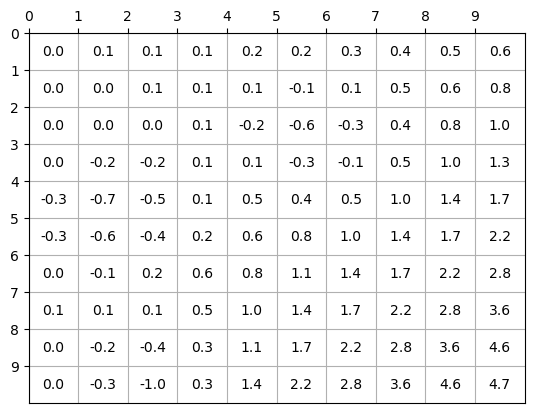

In [322]:
gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=1)
agent = Agent(gw)
agent.plot_value_matrix()

Question (3)

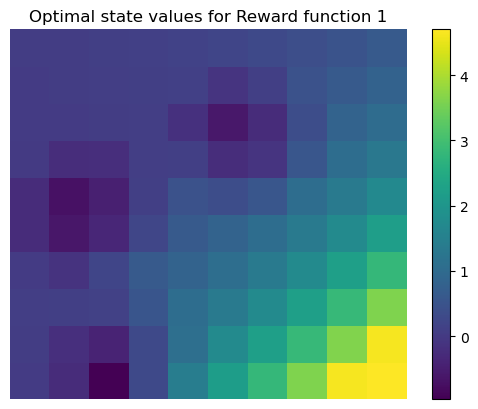

In [323]:
agent.plot_value_heatmap()

Question (4):

The values are higher for areas that are far from the penalties

Question (5):

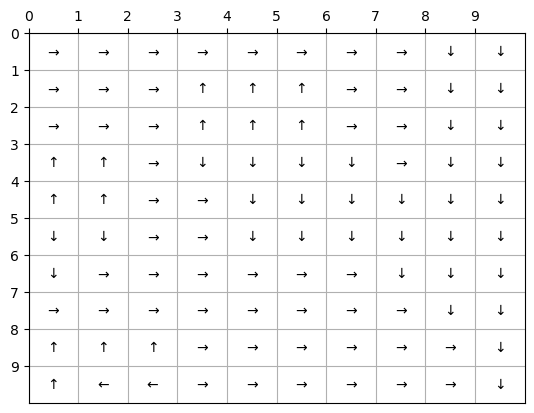

In [324]:
agent.plot_arrow()

Question(6)

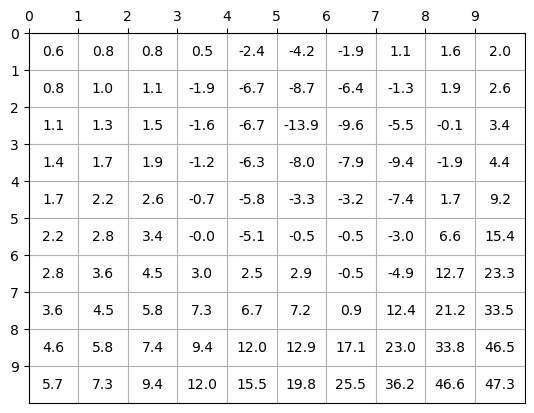

In [251]:
gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=2)
agent = Agent(gw)
agent.plot_value_matrix()

Question(7)

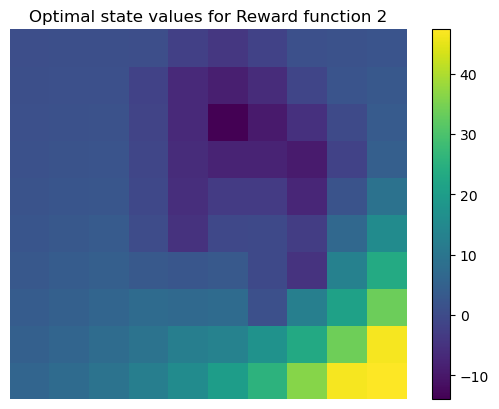

In [252]:
agent.plot_value_heatmap()

Question(8)

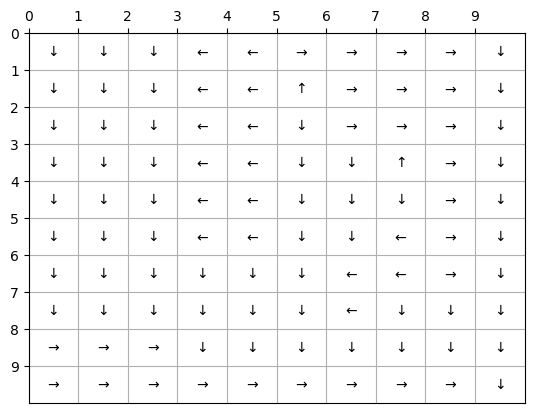

In [253]:
agent.plot_arrow()

Question(9)

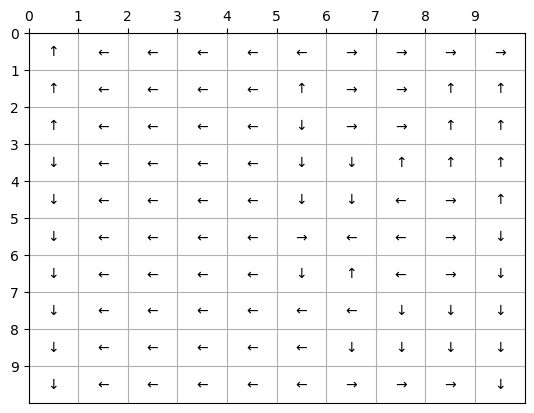

In [254]:
gw = Gridworld(grid_size=10, wind=0.6, discount=0.8, reward_function=2)
agent = Agent(gw)
agent.plot_arrow()

# Inverse Reinforcement Learning

Question(11)

In [349]:
importlib.reload(proj3_agent)
from proj3_agent import Agent

def run_plot_irl(reward_function: int, n_lambdas: int = 500, a1: int = 0) -> Tuple[float, float]:
    """Runs irl part of the project and plots lambda values vs accuracy
    
    Parameters
    ----------
    reward_function: {1, 2}
    n_lambdas: default=500
        Number of lambdas values between [0,5] to try
    a1: {0,1,2,3}, default=0

    Returns
    -------
    max_accuracy: float
        Maximum accuracy achieved
    max_lambda: float
        Lambda value that achieved the maximum accuracy          
    """
    # Setup agent and gridworld
    gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=reward_function)
    agent = Agent(gw)

    # Run IRL for each lambda
    lambdas = np.linspace(0, 5, n_lambdas)
    accuracies = np.empty(n_lambdas)
    for i, lmbd in enumerate(tqdm(lambdas)):
        accuracies[i] = agent.run_irl(lmbd)[2]

    plt.plot(lambdas, accuracies)
    plt.xlabel('Lambda')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Lambda (Reward function {reward_function})')
    plt.show()

    return np.max(accuracies), lambdas[np.argmax(accuracies)]

100%|██████████| 500/500 [01:05<00:00,  7.67it/s]


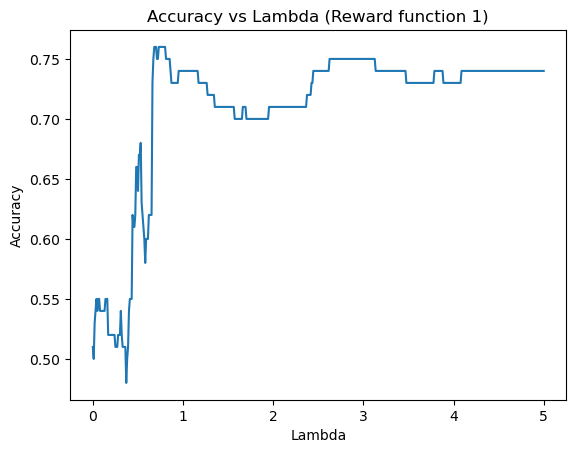

In [350]:
max_accuracy, max_lambda = run_plot_irl(reward_function=1, n_lambdas=500)

Question 12

In [351]:
print(f'Max accuracy: {max_accuracy}, lambda: {max_lambda}')

Max accuracy: 0.76, lambda: 0.6813627254509018


Question 13

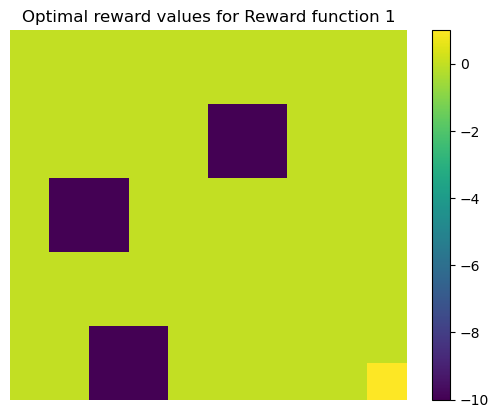

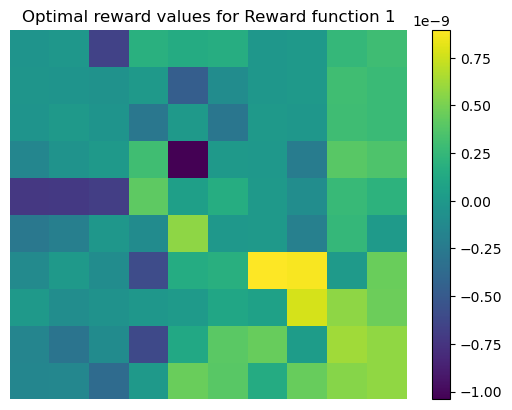

In [352]:
importlib.reload(proj3_agent)
from proj3_agent import Agent

gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=1)
agent = Agent(gw)
agent.run_irl(max_lambda)
# agent.run_irl(0.5)
agent.plot_reward_heatmap('original')
plt.show()
agent.plot_reward_heatmap('irl')

Question (14)

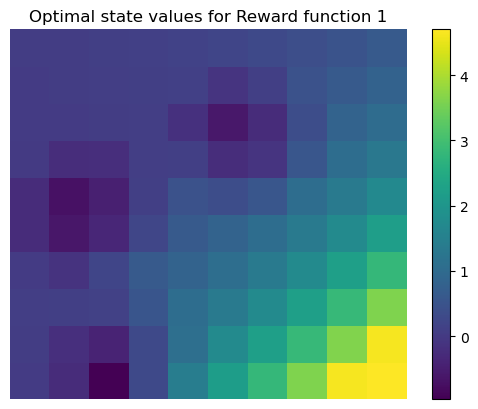

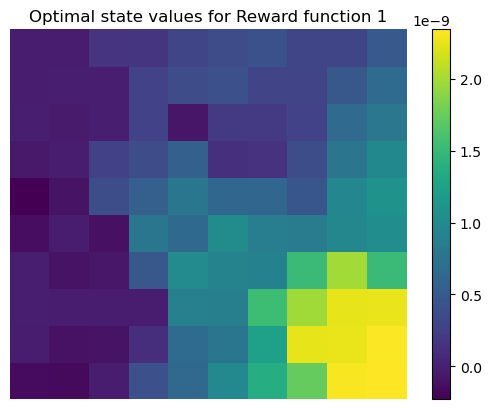

In [353]:
agent.plot_value_heatmap('original')
plt.show()
agent.plot_value_heatmap('irl')

Question (15)  
They are very different, who knows why

Question (16)

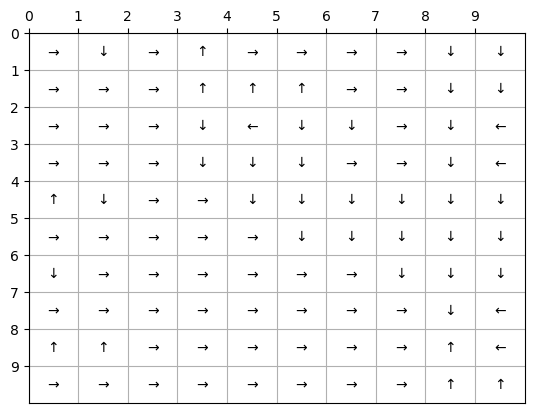

In [261]:
agent.plot_arrow('irl')

Question (17)  
They are different who knows why

Question (18)

100%|██████████| 500/500 [01:20<00:00,  6.19it/s]


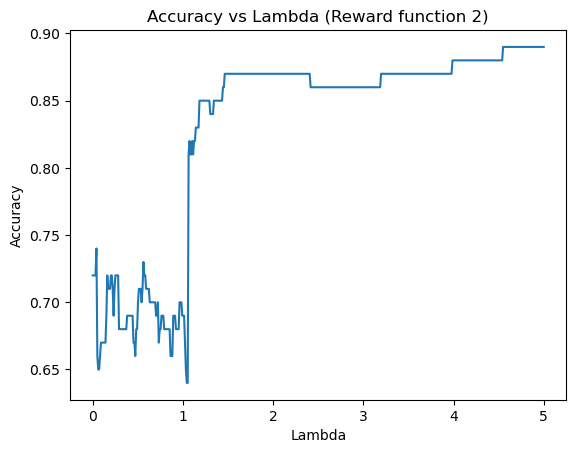

In [345]:
importlib.reload(proj3_agent)
from proj3_agent import Agent
max_accuracy_2, max_lambda_2 = run_plot_irl(reward_function=2, n_lambdas = 500)

Question (19)

In [346]:
print(f'Max accuracy: {max_accuracy_2}, lambda: {max_lambda_2}')

Max accuracy: 0.89, lambda: 4.5490981963927855


Question (20)

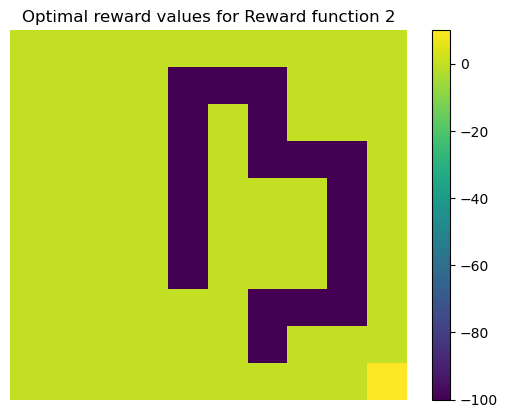

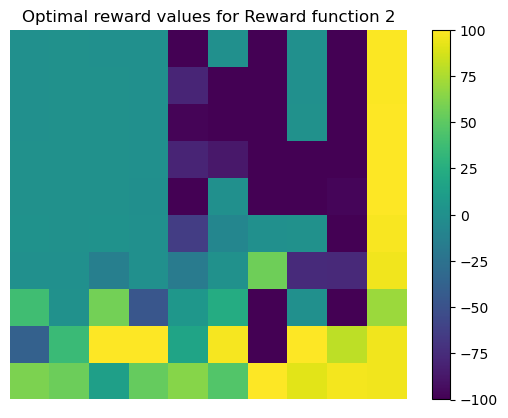

In [347]:
importlib.reload(proj3_agent)
from proj3_agent import Agent

gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=2)
agent = Agent(gw)
# agent.run_irl(max_lambda_2)
agent.run_irl(0.6)
agent.plot_reward_heatmap('original')
plt.show()
agent.plot_reward_heatmap('irl')

Question (21)

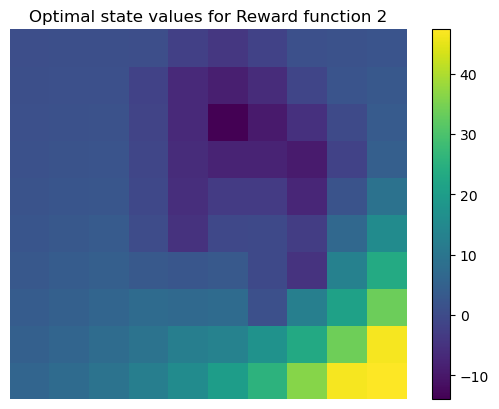

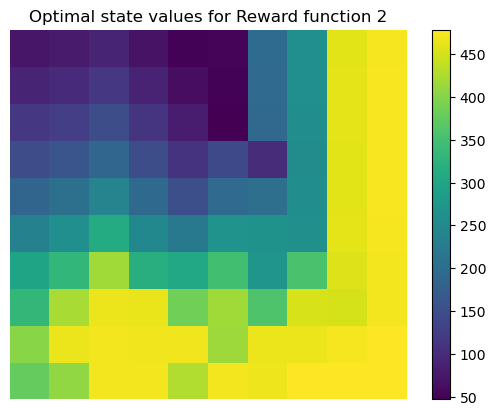

In [348]:
agent.plot_value_heatmap('original')
plt.show()
agent.plot_value_heatmap('irl')

Question (22)  
who knows

Question (23)

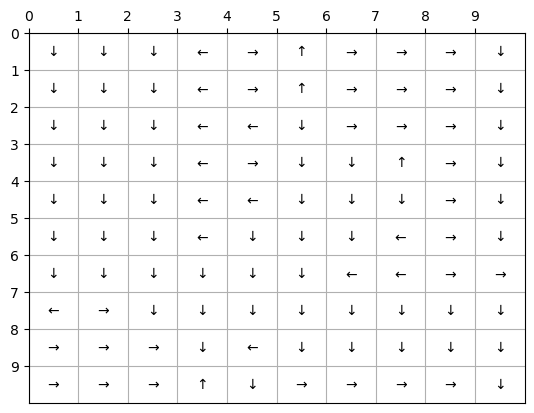

In [266]:
agent.plot_arrow('irl')

Question (24)  
who knows

Questiuon (25)

In [409]:
importlib.reload(proj3_agent)
from proj3_agent import Agent

gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=2)
agent = Agent(gw, policy_iteration=False)
policy_truth = agent.optimal_policy
agent.run_irl(max_lambda_2, policy_iteration=True)
policy_irl = agent.irl_policy
print(f'Accuracy: {np.mean(policy_truth == policy_irl)}')

Accuracy: 0.89


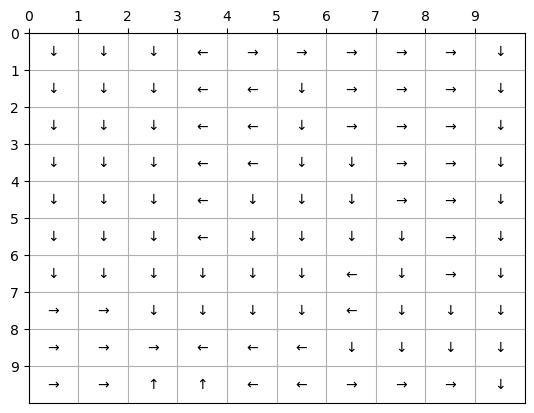

In [395]:
agent.run_irl(max_lambda_2, policy_iteration=True)
agent.plot_arrow('irl')

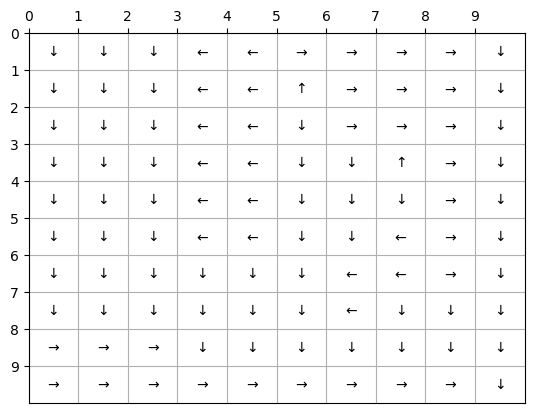

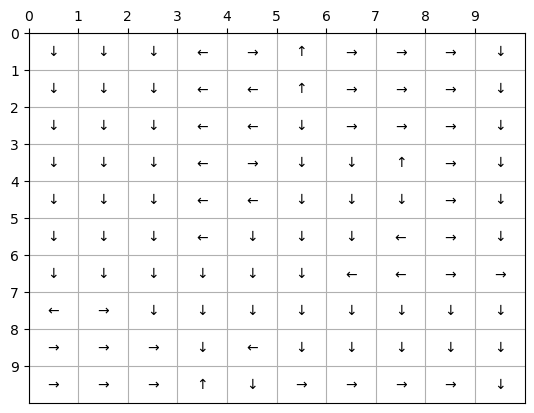

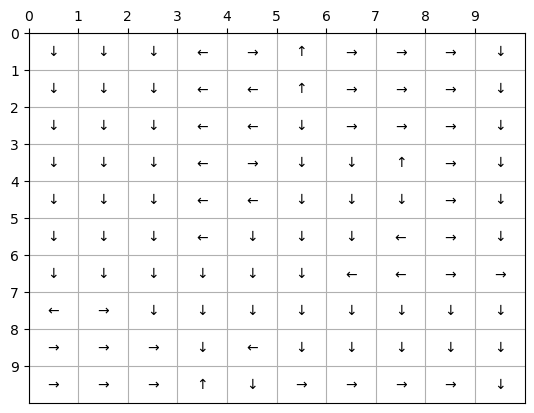

0.89
0.89


In [383]:
importlib.reload(proj3_agent)
from proj3_agent import Agent

gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=2)
agent = Agent(gw)
agent.run_irl(max_lambda_2)
agent.plot_arrow('original')
policy_truth = agent.optimal_policy
plt.show()
agent.plot_arrow('irl')
policy_irl_original = agent.irl_policy
plt.show()
threshold = 1e-5
agent = Agent(gw)
agent.run_irl(max_lambda_2, threshold=threshold)
agent.plot_arrow('irl')
policy_irl_threshold = agent.irl_policy
plt.show()

print(np.sum(policy_truth == policy_irl_original) / 100)
print(np.sum(policy_truth == policy_irl_threshold) / 100)

In [382]:
importlib.reload(proj3_agent)
from proj3_agent import Agent

gw = Gridworld(grid_size=10, wind=0.1, discount=0.8, reward_function=2)

max_policy_val = -1
agent = Agent(gw)
policy_truth = agent.optimal_policy

for eps in [1e-3, 1e-4, 1e-5, 1e-6]:
    for lmbd in np.linspace(0, 5, 20):
        agent.run_irl(lmbd, threshold=eps)
        policy_irl_threshold = agent.irl_policy

        max_policy_val = max(max_policy_val, np.sum(policy_truth == policy_irl_threshold) / 100)

print(max_policy_val)
# print(0.91)

0.91
